In [6]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import time
import math

In [8]:
def TSP(graph):

    if nx.number_connected_components(graph)>1:
        print("Graph is not fully connected, so no solutions exist!")

    else:

        # Create a copy of the graph so we don't modify the original
        G = graph.copy()

        # Choose a random start node
        start = random.choice(list(G.nodes()))

        # Initialize a list of nodes travelled
        itinerary = [start]

        # Initialize a list of costs
        costs = []

        while(G.number_of_nodes()>1):

            # Create a subgraph of just the start node and its immediate neighbors
            H = nx.ego_graph(G, start, radius=1)

            # Some edges in H are between neighbors, so we need to remove these
            edge_del = [edge for edge in H.edges() if (edge[0]!=start and edge[1]!=start)]
            H.remove_edges_from(edge_del)

            # Create a dictionary of all the edges and their weights for the starting node
            mydict = nx.get_edge_attributes(H, 'weight')

            # Select the edge with the smallest weight and get the edge attribute
            selected_edge = min(mydict, key=mydict.get)
            edge_cost = mydict.get(selected_edge)

            # Remove the starting node from the graph
            G.remove_node(start)

            # Get the next starting node
            start = [node for node in selected_edge if (node!=start)][0]

            itinerary.append(start)
            costs.append(edge_cost)

        return(itinerary, costs)


# Sample networkx text case
#G = nx.erdos_renyi_graph(20, 0.5)
#for (u,v,w) in G.edges(data=True):
#    w['weight'] = random.randint(1,10)
#path, costs = TSP(G)


In [48]:
G = nx.erdos_renyi_graph(20, 0.5)

In [49]:
for (u,v,w) in G.edges(data=True):
    w['weight'] = random.randint(1,10)

In [50]:
 TSP(G)

([2, 4, 11, 5, 3, 7, 12, 0, 15, 14, 17, 10, 16, 6, 13, 18, 8, 19, 1, 9],
 [1, 2, 1, 6, 1, 1, 1, 3, 3, 2, 1, 2, 6, 2, 7, 2, 3, 10, 7])

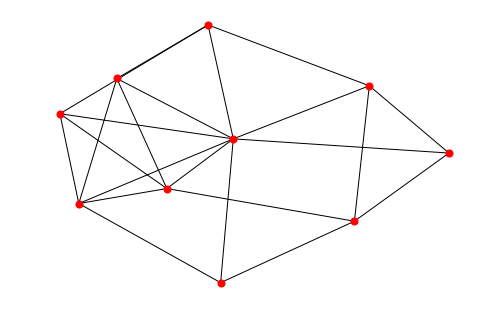

In [68]:
# Generates a graph with 20 nodes
# Connects all pair of nodes with a bernoulli(p=0.5) trial
G = nx.erdos_renyi_graph(10, 0.5)
# Draws the graph for visualization
nx.draw(G, node_size=50)
# Loops through each edge
# u and v are the nodes and w is the edge connecting them
# assigns a random integer weight to each edge
for (u,v,w) in G.edges(data=True):
    w['weight'] = random.randint(1,10)

In [70]:
 for i in range(100):
    print(TSP(G))

([4, 7, 0, 5, 6, 1, 9, 2, 8, 3], [1, 2, 1, 2, 6, 7, 2, 5, 2])
([0, 5, 6, 1, 9, 2, 8, 3, 4, 7], [1, 2, 6, 7, 2, 5, 2, 9, 1])
([2, 9, 4, 7, 0, 5, 6, 1, 8, 3], [2, 2, 1, 2, 1, 2, 6, 10, 2])
([9, 2, 5, 0, 7, 4, 3, 8, 1, 6], [2, 3, 1, 2, 1, 9, 2, 10, 6])
([3, 8, 5, 0, 7, 4, 9, 2, 6, 1], [2, 4, 1, 2, 1, 2, 2, 6, 6])
([9, 2, 5, 0, 7, 4, 3, 8, 1, 6], [2, 3, 1, 2, 1, 9, 2, 10, 6])
([9, 2, 5, 0, 7, 4, 3, 8, 1, 6], [2, 3, 1, 2, 1, 9, 2, 10, 6])
([4, 7, 0, 5, 6, 1, 9, 2, 8, 3], [1, 2, 1, 2, 6, 7, 2, 5, 2])
([8, 3, 5, 0, 7, 4, 9, 2, 6, 1], [2, 7, 1, 2, 1, 2, 2, 6, 6])


ValueError: min() arg is an empty sequence